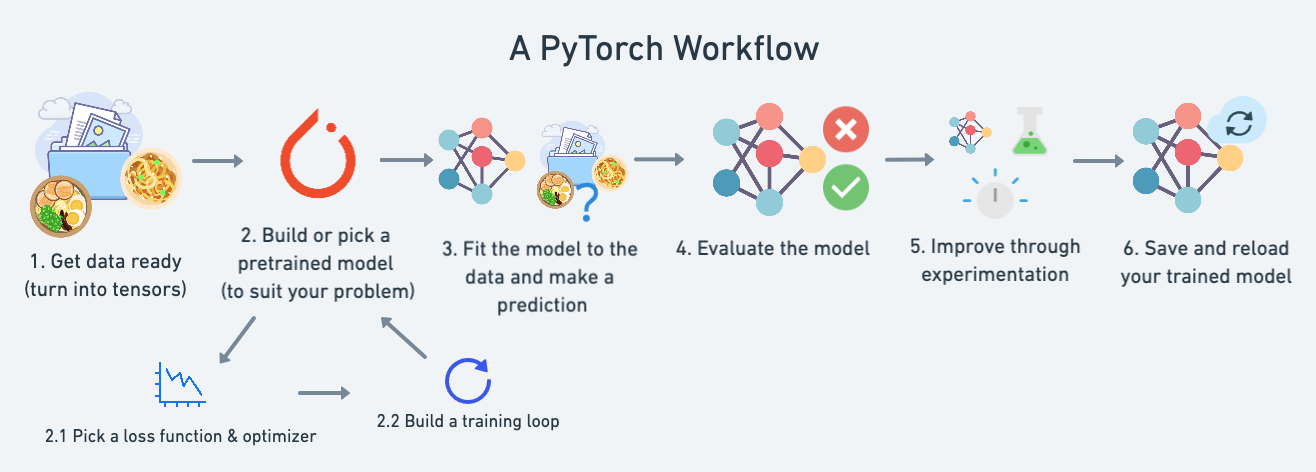

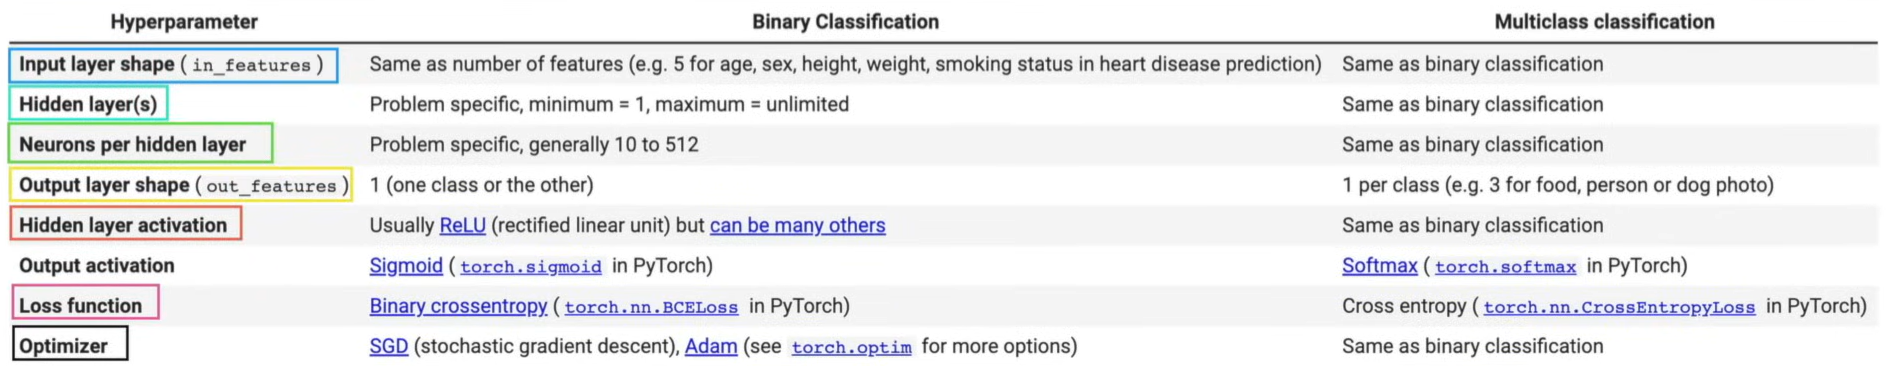

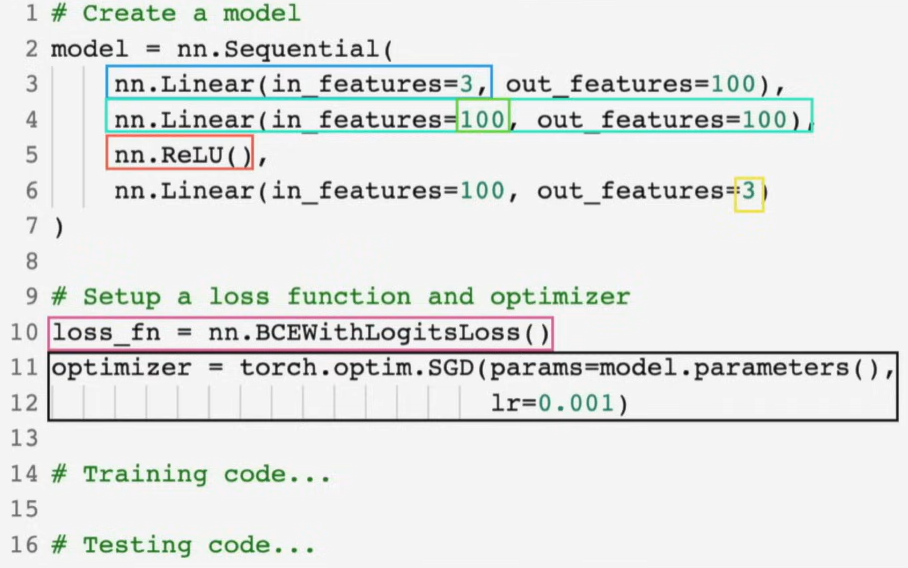

### Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the option)

#### 1. Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles
# https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_circles.html

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [5]:
# Make DataFrame of circle Data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})

circles.sample(10)

X1        X2  label
277  0.190208  0.788950      1
630  0.632239 -0.445755      1
232  0.965693 -0.196981      0
468  0.736330  0.184390      1
617  0.794542  0.173906      1
701 -0.142691  0.713237      1
148 -0.470410 -0.597575      1
711 -0.297139  0.712138      1
381 -0.268202  0.984474      0
518  0.784214 -0.159169      1

In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

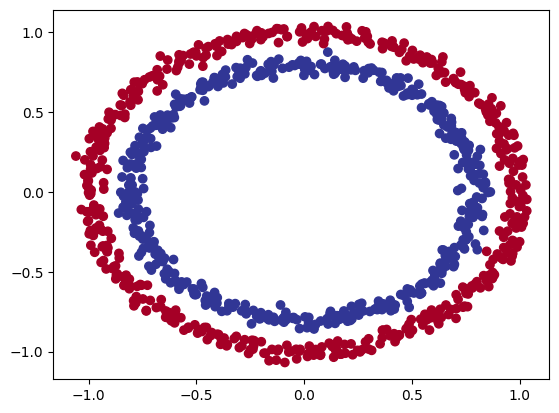

In [7]:
# Visualize

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [8]:
# Do we have a blue dot or a Red dot?!!

#### 1.1 Check Input and Output Shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [12]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


#### 1.2 Turn data into tensors and create train and test splits

In [13]:
# Turn data into tensors
import torch
torch.__version__

'2.5.1+cu121'

In [14]:
type(X)

numpy.ndarray

In [15]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [16]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [18]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

#### 2. Building a Model

To do so, we want to:
1. Setup device agnostic code so that our code will run on an accelerator if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and testing loop

In [19]:
# import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create two `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation)
4. Instantiate an instance of our model class and send it to the target `device`

In [20]:
X_train.shape

torch.Size([800, 2])

In [21]:
# 1. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # Create two nn.Linear layers capable of handling the shape of our data
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features from previous layer and outputs a single feature (same size as output)

    # Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
device

'cuda'

In [23]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [24]:
# Let's replicate the model above using nn.Sequential()

model_1 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 8),
    nn.Linear(in_features = 8, out_features = 1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [25]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
# Rewritting the model 0 using nn.Sequential()

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features = 2, out_features = 5),
            nn.Linear(in_features = 5, out_features = 1)
        )

    # Define a forward() method that outlines the forward pass
    def forward(self, x):
        return two_linear_layers(x)

# Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [27]:
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[-0.0243, -0.0236],
                      [-0.3640, -0.1701],
                      [ 0.5387, -0.0743],
                      [ 0.2672,  0.2460],
                      [-0.1487, -0.5892]], device='cuda:0')),
             ('two_linear_layers.0.bias',
              tensor([-0.2500, -0.5063,  0.6791,  0.3881, -0.5003], device='cuda:0')),
             ('two_linear_layers.1.weight',
              tensor([[-0.1298, -0.4367,  0.2371,  0.2741,  0.4275]], device='cuda:0')),
             ('two_linear_layers.1.bias', tensor([0.2894], device='cuda:0'))])

In [28]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3985,  0.2708],
                      [-0.5920,  0.5853],
                      [-0.2164,  0.4627],
                      [ 0.5542, -0.3854],
                      [ 0.2469, -0.3836],
                      [ 0.0708, -0.3226],
                      [ 0.1978, -0.2664],
                      [ 0.4840,  0.1586]], device='cuda:0')),
             ('0.bias',
              tensor([-0.3541,  0.4961, -0.4354, -0.2724, -0.3839, -0.2250, -0.1451, -0.4730],
                     device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2744, -0.1639,  0.0721,  0.2309, -0.2283, -0.0368, -0.1011, -0.3158]],
                     device='cuda:0')),
             ('1.bias', tensor([0.0563], device='cuda:0'))])

In [29]:
# Make Predictions
with torch.inference_mode():
    untrained_preds = model_1(X_test.to(device))
    print(f"Length of predictions: {len(untrained_preds)} | Shape: {untrained_preds.shape}")
    print(f"Length of test samples: {len(X_test)} | Shape: {X_test.shape}")
    print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}") # TRY without round
    print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200 | Shape: torch.Size([200, 1])
Length of test samples: 200 | Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#### 2.1 Setup loss function and Optimizer

Which loss function or optimizer should we use?

Problem specific...

---

Example:

For `regression` we might want MAE or MSE

For `classification` we might need binary cross entropy or categorical cross entropy (cross entropy)


---


And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built in options.

**For Loss Functions and Optims**

- For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article : https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

- For a definition on what a logit is in Deep Learning : https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow

- For different optimizers see : `torch.optim`

**Logits in detail:**

Difference between Odds and Probabilities

 https://youtu.be/ARfXDSkQf1Y

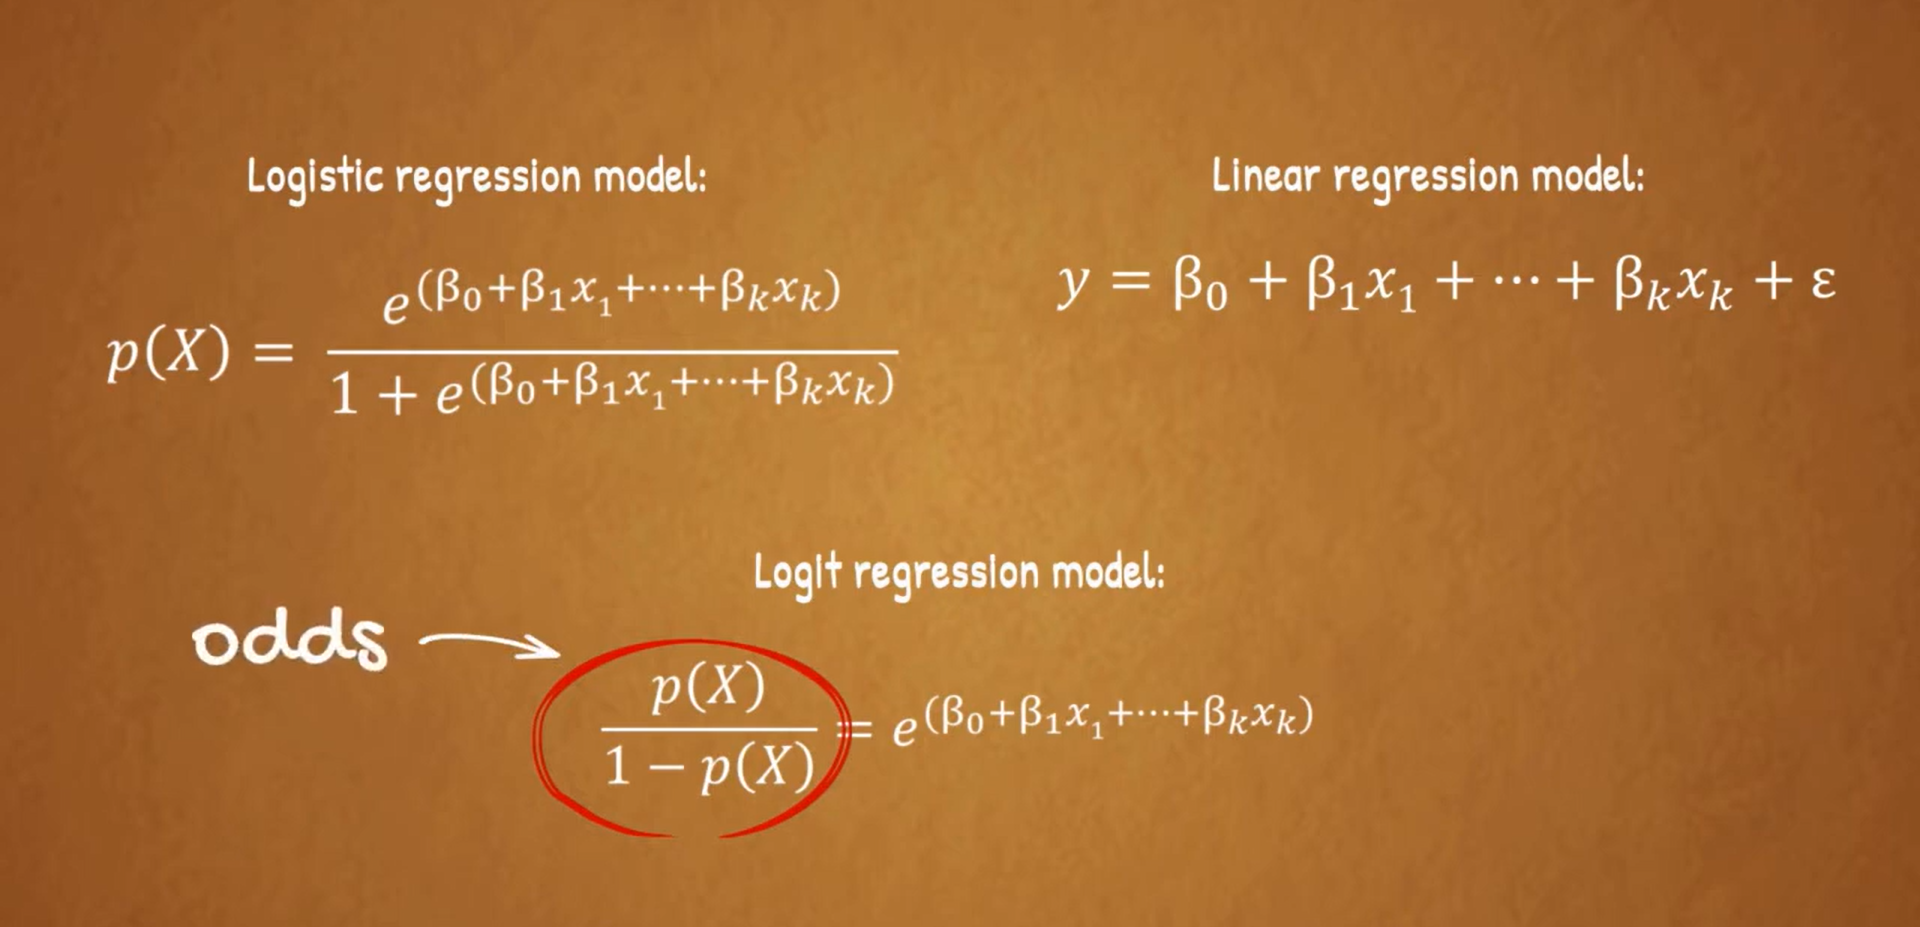

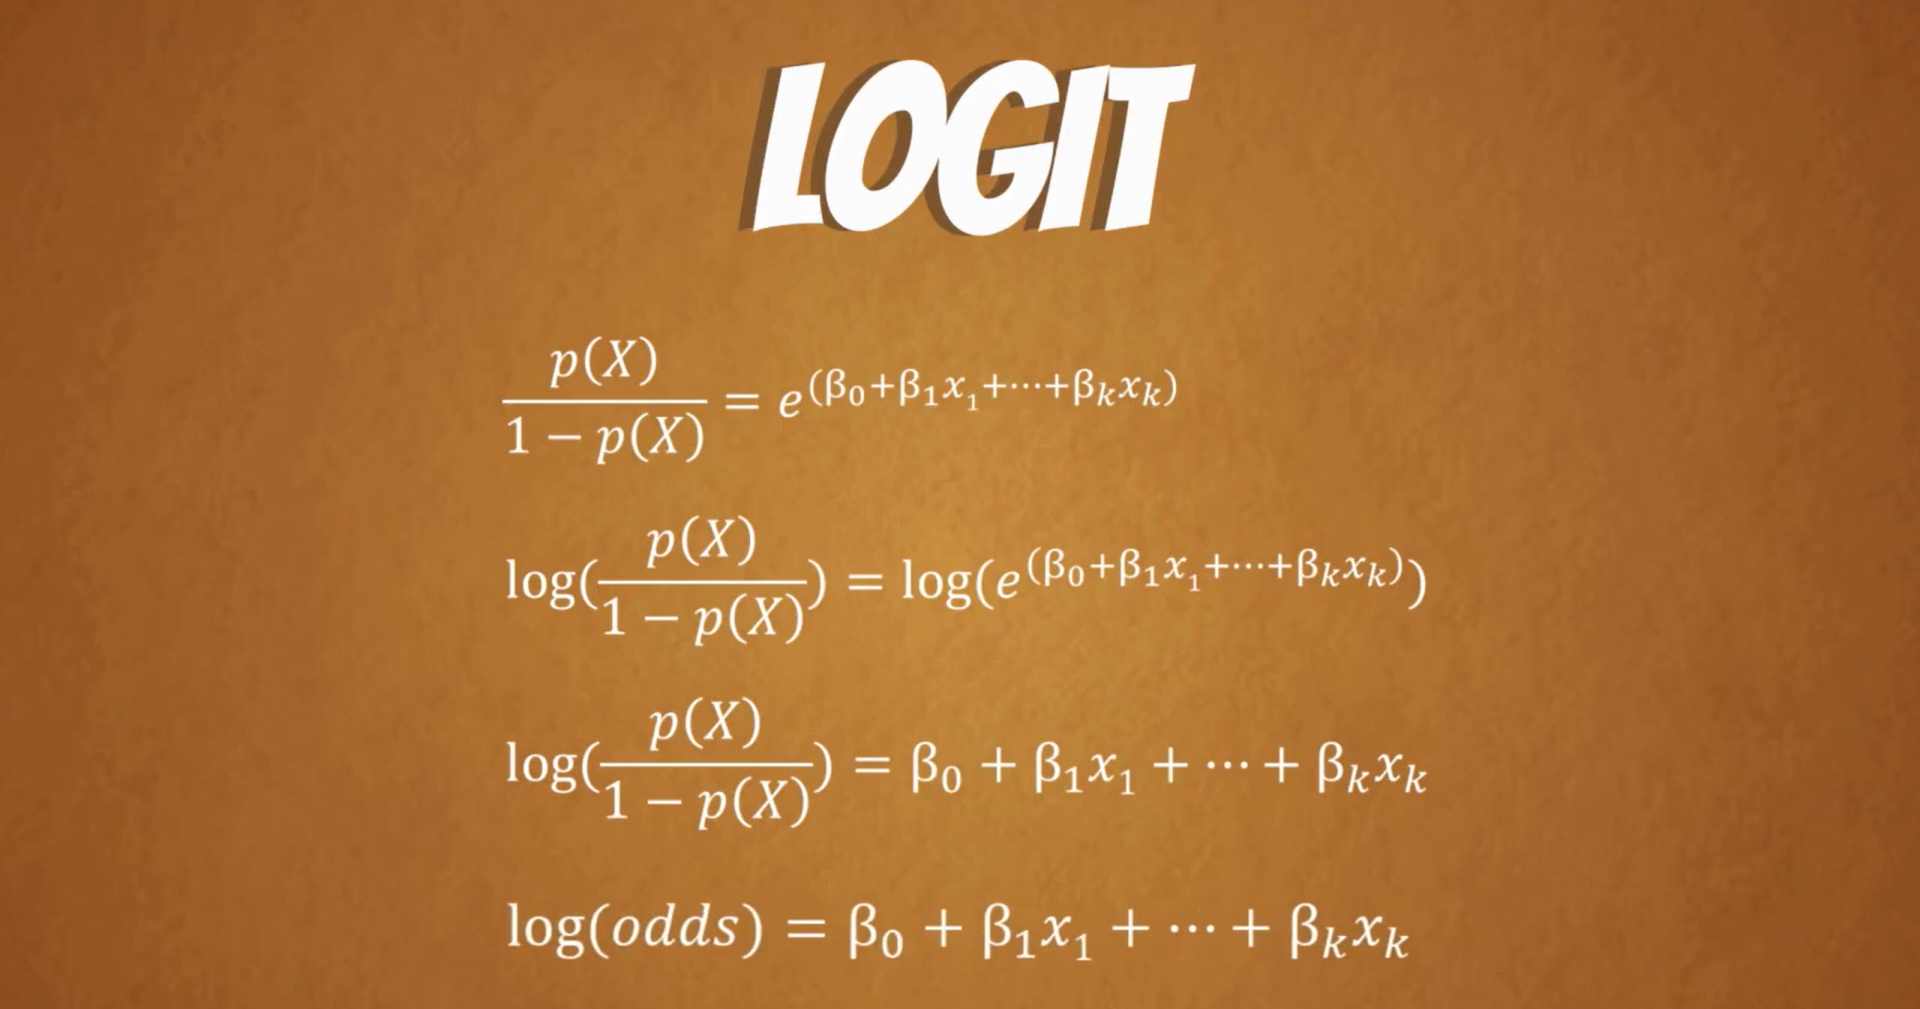

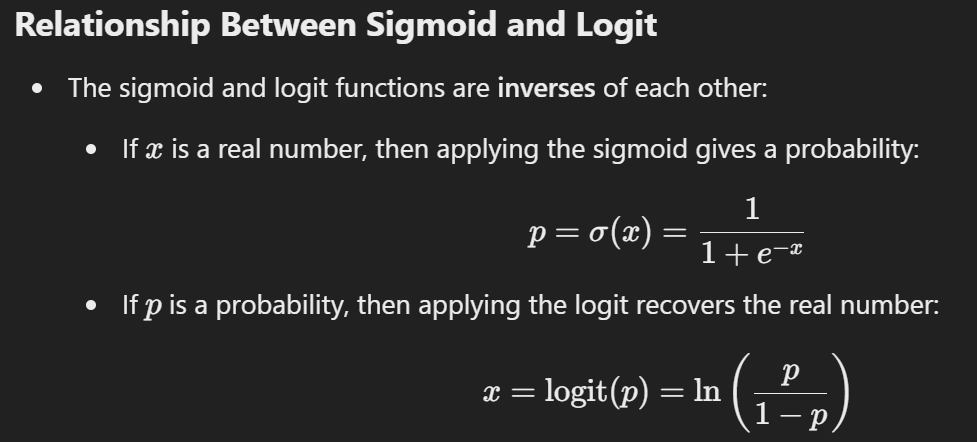

**Logistic Regression:**

Logistic Regression is all about predicting binary variables, not predicting continuous variables.

https://youtu.be/VImxF-9jk1E

In [30]:
# Setup the loss function

## loss_fn = nn.BCELoss # BCELoss requires input to have gone through the sigmoid activation function prior to input to BCELoss

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss has Sigmoid activation function built-in

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [31]:
# Calculate accuracy : Out of 100 examples, what percentage does our model get right!

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

#### 3. Train Model

To train our model, we're going to need to build a training loop (F-L-Oz B-Os)

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backward (backpropagations)
5. Optimizer step (Gradient Descent)

**3.1 Going from : Raw logits -> *Prediction* probabilities-> Prediction labels**

Our model outputs are going to be raw logits

We can convert these `logits` into prediction probabilities by passing them to some kind of activation function. (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert model's prediction probabilities to prediction labels by either rounding them or taking the `argmax()`

> `In logistic regression`, the linear model outputs log-odds, which are transformed into probabilities using the sigmoid function for classification.

In [32]:
# View first 5 outputs of the forward pass on the test data
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_test.to(device))[:5]

y_logits

tensor([[ 0.0103],
        [ 0.0439],
        [-0.0173],
        [ 0.0178],
        [ 0.0792]], device='cuda:0')

In [33]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [34]:
# Use the sigmoid activation function on the logits of our model to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.5026],
        [0.5110],
        [0.4957],
        [0.5045],
        [0.5198]], device='cuda:0')

For our predictions probability values, we need to perform a range-style rounding on them:

- `y_pred_probs` >= 0.5, `y = 1` (Class 1)
- `y_pred_probs` < 0.5, `y = 0` (Class 0)

In [35]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.]], device='cuda:0')

In [36]:
# Find the predicted labels

y_preds = torch.round(y_pred_probs)

# IN FULL (logits -> pred_probs -> pred_labels)
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 1.], device='cuda:0')

In [37]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

#### 3.2 Building training and testing loop

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epoches
epochs = 100

# Put the data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test  = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # Training
    model_1.train()

    # Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # Calculate loss/accuracy
    loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
                   y_train)
    loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

    # Optimizer zero grad : A method that clears (or resets) the gradients of all the parameters that the optimizer is managing.
    # It is typically used in training loops to ensure that gradients do not accumulate across multiple backward passes.
    optimizer.zero_grad()

    # Loss backward (backpropagation)
    loss.backward()

    # Optimizer step (update the parameters to reduce the gradient)
    optimizer.step()

    # TESTING..
    model_1.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate the test loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred)

    # Print out what's happening
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69358 | Accuracy: 52.75% | Test Loss: 0.69464 | Test Accuracy: 50.50%
Epoch: 10 | Loss: 0.69336 | Accuracy: 52.38% | Test Loss: 0.69463 | Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69324 | Accuracy: 51.88% | Test Loss: 0.69465 | Test Accuracy: 49.00%
Epoch: 30 | Loss: 0.69316 | Accuracy: 51.25% | Test Loss: 0.69469 | Test Accuracy: 47.00%
Epoch: 40 | Loss: 0.69311 | Accuracy: 52.00% | Test Loss: 0.69472 | Test Accuracy: 47.00%
Epoch: 50 | Loss: 0.69307 | Accuracy: 50.62% | Test Loss: 0.69475 | Test Accuracy: 47.50%
Epoch: 60 | Loss: 0.69304 | Accuracy: 51.38% | Test Loss: 0.69478 | Test Accuracy: 47.50%
Epoch: 70 | Loss: 0.69303 | Accuracy: 51.25% | Test Loss: 0.69480 | Test Accuracy: 47.00%
Epoch: 80 | Loss: 0.69301 | Accuracy: 51.00% | Test Loss: 0.69482 | Test Accuracy: 47.50%
Epoch: 90 | Loss: 0.69300 | Accuracy: 51.12% | Test Loss: 0.69483 | Test Accuracy: 47.00%


#### 4. Let's make some predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it let's make some predictions and have some visualization

⭐ To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [39]:
import requests
from pathlib import Path


# Download helper function from github
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exist, skipping the download")
else:
    print("Downloading the helper_functions.py file")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

    with open("helper_functions.py","wb") as f:
        f.write(request.content)

In [40]:
from helper_functions import plot_predictions, plot_decision_boundary

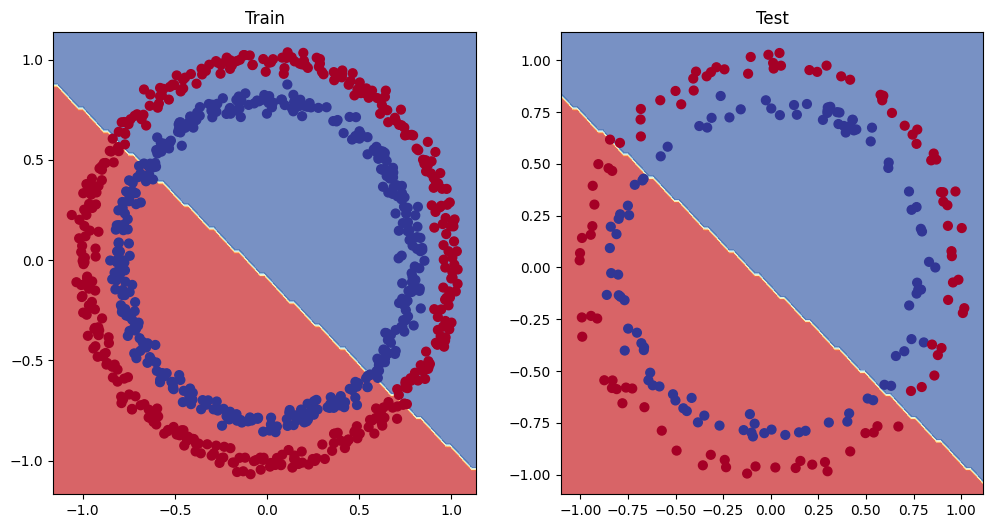

In [41]:
# Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

☹️ I want a circular decision boundary. Not a straight line

#### 5. Improving a model (from a model perspective)

- Add more layers: Give the model more chance to learn about patterns in the data
- Add more hidden  : go from 5 hidden units to 10 hidden units
- Fit for longer
- Changing the activation function
- Change the learning rate
- Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values (we as machine learning engineers and data scientists) can change, they are referred to as **hyperparameters**

Let's try and improve our model by:
- Adding more hidden units : from 5 to 10
- Increase the number of layers : 2 to 3
- Increase the number of epochs: 100 to 1000

In [42]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

    def forward(self, x):
        # z = self.layer_1(x) # z = logits
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [43]:
model_2 = CircleModelV1().to(device)
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [45]:
# Create a loss function
# Create an optimizer
# Write a trainig and evaluation loop for model_2

In [46]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(lr = 0.1, params = model_2.parameters())

In [47]:
# Write a training and evaluation loop for model_2
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs
Epochs = 1000

# Put the data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test  = X_test.to(device), y_test.to(device)

for epoch in range(Epochs):
    model_2.train()
    # 1.Forward
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2.Loss/Accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

    # 3.Optimize zero grad
    optimizer.zero_grad()

    # 4.Backward
    loss.backward()

    # 5.Optimizer step
    optimizer.step()

    # TESTING
    model_2.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_2(X_test).squeeze()

        test_preds = torch.round(torch.sigmoid(test_logits))

        # Calculate loss
        test_loss = loss_fn(test_logits, y_test)

        # Accuracy
        test_acc = accuracy_fn(y_true = y_test, y_pred = test_preds)

    # print out what's happening
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Accuracy: 50.88% | Test Loss: 0.69261 | Test Accuracy: 51.00%
Epoch: 10 | Loss: 0.69369 | Accuracy: 50.25% | Test Loss: 0.69270 | Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69351 | Accuracy: 50.12% | Test Loss: 0.69283 | Test Accuracy: 49.50%
Epoch: 30 | Loss: 0.69339 | Accuracy: 50.50% | Test Loss: 0.69297 | Test Accuracy: 48.00%
Epoch: 40 | Loss: 0.69329 | Accuracy: 50.38% | Test Loss: 0.69310 | Test Accuracy: 49.00%
Epoch: 50 | Loss: 0.69322 | Accuracy: 49.88% | Test Loss: 0.69324 | Test Accuracy: 50.00%
Epoch: 60 | Loss: 0.69317 | Accuracy: 49.38% | Test Loss: 0.69336 | Test Accuracy: 51.50%
Epoch: 70 | Loss: 0.69312 | Accuracy: 49.38% | Test Loss: 0.69348 | Test Accuracy: 50.50%
Epoch: 80 | Loss: 0.69309 | Accuracy: 50.12% | Test Loss: 0.69359 | Test Accuracy: 50.00%
Epoch: 90 | Loss: 0.69307 | Accuracy: 50.50% | Test Loss: 0.69370 | Test Accuracy: 48.50%
Epoch: 100 | Loss: 0.69305 | Accuracy: 50.38% | Test Loss: 0.69379 | Test Accuracy: 48.00%
Epoch: 110

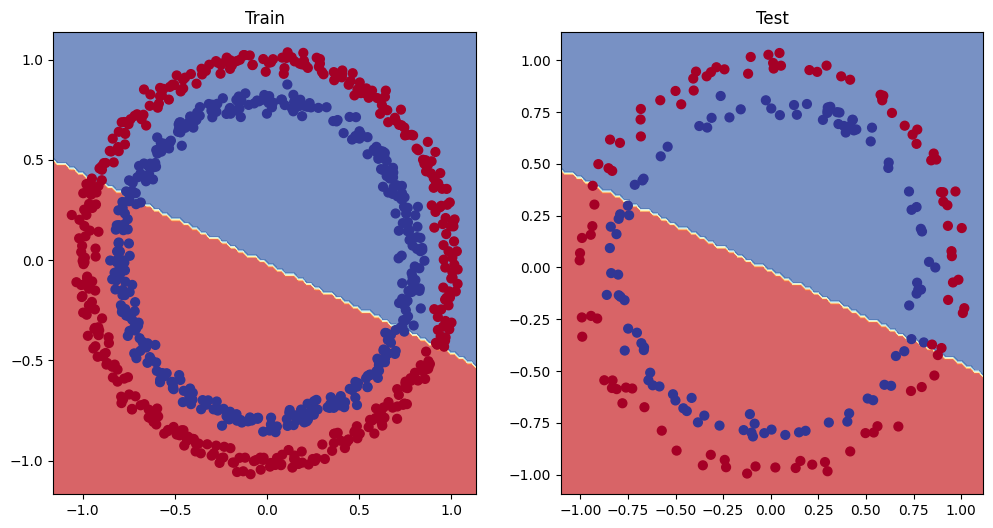

In [48]:
# Plot the decision boundary
# Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

#### 5.1 Preparing data to see if our model can fit a straight line
One way to troubleshoot larger problem is to work with smaller problem

In [49]:
# Let's create a smaller problem
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias

# Check the data
X_regression[:5],y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [50]:
# Create train and test splits
train_split = int(0.8* len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

In [51]:
len(X_train_regression), len(X_test_regression)

(80, 20)

In [52]:
len(y_train_regression), len(y_test_regression)

(80, 20)

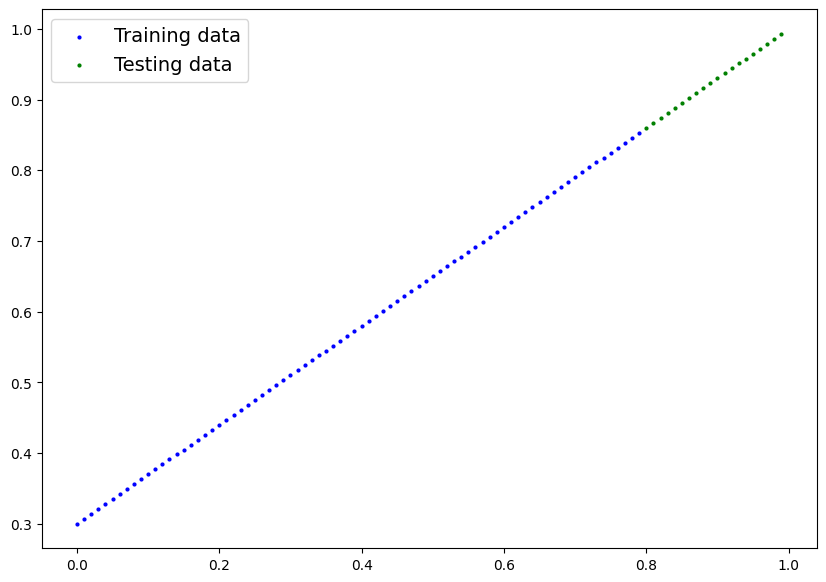

In [53]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [54]:
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

#### 5.3 Adjusting `model_2` to fit a straight line

In [55]:
X_train_regression[:3], y_train_regression[:3]

(tensor([[0.0000],
         [0.0100],
         [0.0200]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140]]))

In [56]:
# Same architecture as model_2 but using nn.Sequential

model_3 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1),
).to(device)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [57]:
# Loss and Optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_3.parameters(), lr=0.01)

In [58]:
# Train the model
torch.manual_seed(42)

# Epochs
Epochs = 1000

# Put the data to the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression  = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(Epochs):
    y_preds = model_3(X_train_regression)

    # 2.Loss/Accuracy
    loss = loss_fn(y_preds, y_train_regression)

    # 3.Optimize zero grad
    optimizer.zero_grad()

    # 4.Backward
    loss.backward()

    # 5.Optimizer step
    optimizer.step()

    # TESTING
    model_3.eval()
    with torch.inference_mode():
        # Forward pass
        test_preds = model_3(X_test_regression)

        # Calculate loss
        test_loss = loss_fn(test_preds, y_test_regression)

    # print out what's happening
    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


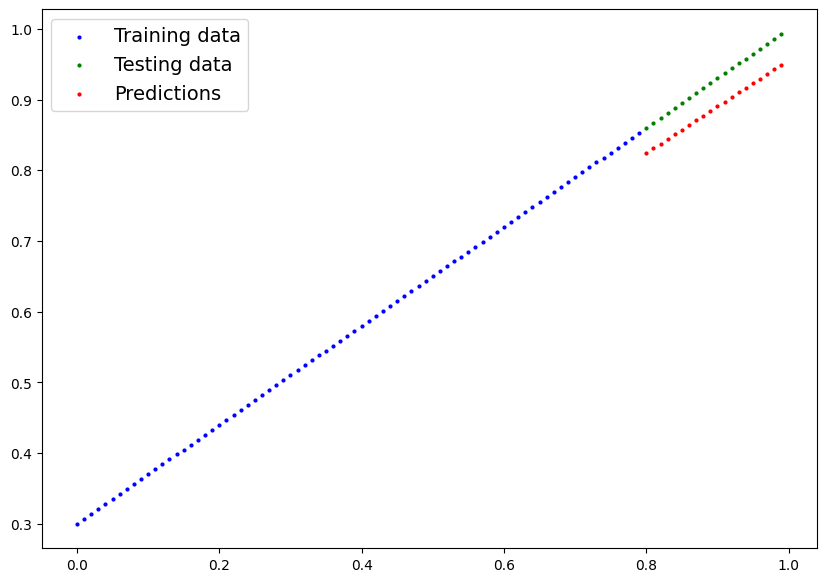

In [59]:
model_3.eval()

with torch.inference_mode():
    y_preds = model_3(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 predictions = y_preds.cpu())

### 6. The missing piece: Non-Linearity

"What patterns could we draw if were given an infinite straight and non-straight lines?
or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

#### 6.1 Recreating non-linear data (red and blue circles)

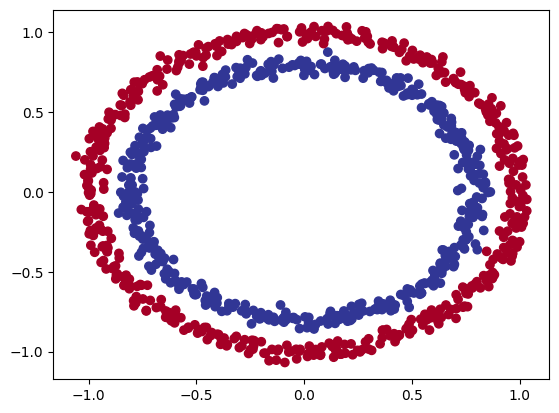

In [60]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

plt.scatter(X[:,0],X[:,1], c=y, cmap = plt.cm.RdYlBu);

In [61]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
X_train[:3], y_train[:3]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240]]),
 tensor([1., 0., 0.]))

#### 6.2 Building a model with non-linearity

In [63]:
# Building a model with non-linear activation functions

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        self.relu = nn.ReLU() # ReLU is a non-Linear activation function

    def forward(self,x):
        # Where should we put our non-linear activation function?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_4 = CircleModelV2().to(device)
model_4

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [64]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr = 0.1)

#### 6.3 Training a model with non-linearity

In [65]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all the data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
epochs = 1000

for epoch in range(epochs):
    model_4.train()

    # Forward pass
    y_logits = model_4(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # Loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_preds)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Optimizer step
    optimizer.step()

    # TESTING >>>
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn (test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                            y_pred = test_preds)

    # pRINT what's happening
    if epoch % 100 == 0:
       print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295 | Accuracy: 50.00% | Test Loss: 0.69319 | Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115 | Accuracy: 52.88% | Test Loss: 0.69102 | Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977 | Accuracy: 53.37% | Test Loss: 0.68940 | Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795 | Accuracy: 53.00% | Test Loss: 0.68723 | Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517 | Accuracy: 52.75% | Test Loss: 0.68411 | Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102 | Accuracy: 52.75% | Test Loss: 0.67941 | Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515 | Accuracy: 54.50% | Test Loss: 0.67285 | Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659 | Accuracy: 58.38% | Test Loss: 0.66322 | Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160 | Accuracy: 64.00% | Test Loss: 0.64757 | Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362 | Accuracy: 74.00% | Test Loss: 0.62145 | Test Accuracy: 79.00%


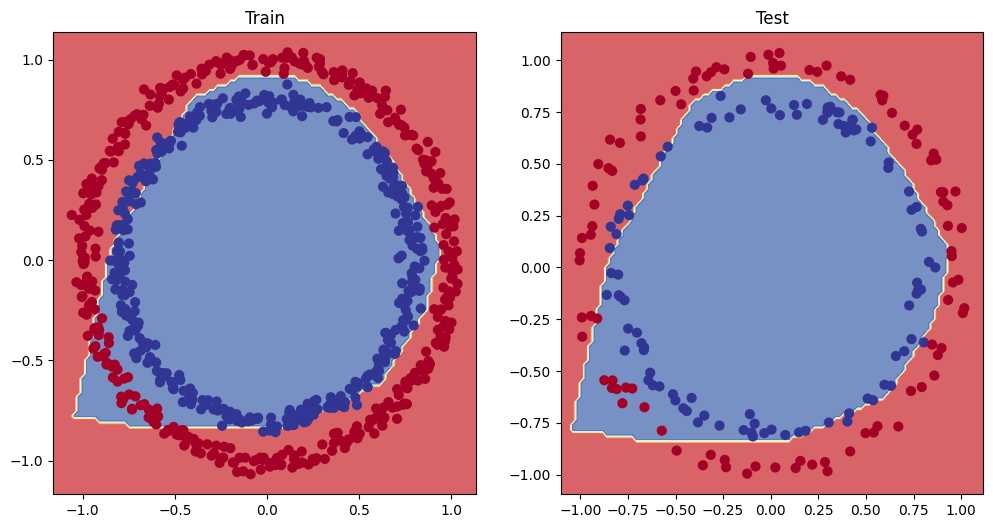

In [66]:
# Plot the decision boundary
# Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

### 7. Putting it all together with a multi-class classification probelm

#### 7.1 Creating a toy multi-class dataset

In [69]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [129]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi_class data
X_blob, y_blob, = make_blobs(n_samples = 1000,
                             n_features = NUM_FEATURES,
                             centers = NUM_CLASSES,
                             cluster_std = 1.5, # give the cluster a little shake up
                             random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split the data into train test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

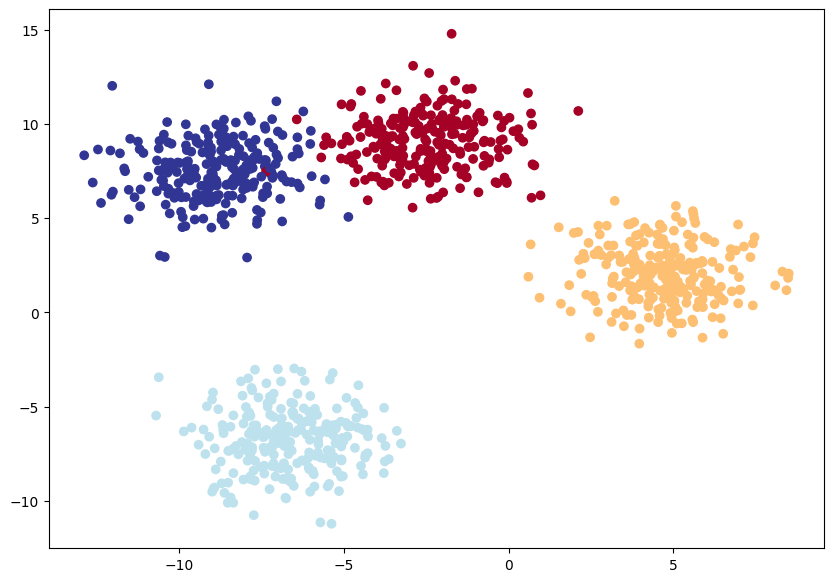

In [130]:
# Plot data
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

#### 7.2 Building a multi-class classification model in PyTorch

In [131]:
# Create a device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [132]:
! nvidia-smi

Mon Dec 23 17:34:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [133]:
# Build a multiclass classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_features)
        )

    def forward(self,x):
        return self.linear_layer_stack(x)

# Create an instance
model_5 = BlobModel(input_features = 2,
                    output_features = 4).to(device)
model_5

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [134]:
X_blob_train[:4]

tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        [-6.0262, -4.4375]])

In [135]:
y_blob_train.unique()

tensor([0, 1, 2, 3])

#### 7.3 Create a loss function and an optimizer for multi-class classification

In [136]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_5.parameters(), lr = 0.1)

#### 7.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs which are logits to prediction probabilities and subsequently to prediction labels.

In [137]:
# Let's get some raw outputs of our model (logits)
model_5(X_blob_test)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
next(model_5.parameters()).device

In [138]:
X_blob_test.device

device(type='cpu')

In [139]:
model_5.eval()
with torch.inference_mode():
    y_logits = model_5(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [140]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

- Logits: Raw scores from the model.
- Sigmoid: Converts logits to probabilities for binary or independent tasks.
- Softmax: Converts logits to a probability distribution for multi-class tasks.

In [141]:
# Convert our model's logit outputs to prediction probabilities

y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [142]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [143]:
torch.sum(y_pred_probs[4])

tensor(1., device='cuda:0')

In [144]:
torch.max(y_pred_probs[0])

tensor(0.3244, device='cuda:0')

In [145]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [146]:
torch.argmax(y_pred_probs[2])

tensor(0, device='cuda:0')

In [147]:
torch.max(y_pred_probs[2])

tensor(0.3011, device='cuda:0')

In [148]:
y_pred_probs[2][2]

tensor(0.2823, device='cuda:0')

In [149]:
# Convert our model's prediction probabilities to prediction labels

y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [150]:
ay_blob_test

NameError: name 'ay_blob_test' is not defined

In [151]:
a = torch.randn(4, 4)
a

tensor([[-0.1360,  1.6354,  0.6547,  0.5760],
        [-0.3609, -0.0606,  0.0733,  0.8187],
        [-0.3753,  1.0331, -0.6867,  0.6368],
        [ 0.2176, -0.0467, -1.4335, -0.5665]])

In [152]:
torch.argmax(a, dim=0) # Vertically

tensor([3, 0, 0, 1])

In [153]:
torch.argmax(a, dim=1) # Horizontally

tensor([1, 3, 1, 0])

#### 7.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [154]:
y_blob_train.dtype

torch.int64

In [158]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Putting the data on to the device
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model_5.train()
    # Forward
    y_logits = model_5(X_blob_train)
    y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

    # Loss
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true = y_blob_train, y_pred = y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backward loss
    loss.backward()

    # Optimizer step
    optimizer.step()

    # TESTING...
    model_5.eval()
    with torch.inference_mode():
        test_logits = model_5(X_blob_test)
        test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true = y_blob_test, y_pred = test_preds)

    # Print out what's happening...
    if epoch % 100 == 0:
       print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.90937 | Accuracy: 67.62% | Test Loss: 0.88772 | Test Accuracy: 74.50%
Epoch: 100 | Loss: 0.03262 | Accuracy: 99.25% | Test Loss: 0.02376 | Test Accuracy: 99.50%
Epoch: 200 | Loss: 0.02650 | Accuracy: 99.25% | Test Loss: 0.01642 | Test Accuracy: 99.50%
Epoch: 300 | Loss: 0.02500 | Accuracy: 99.25% | Test Loss: 0.01436 | Test Accuracy: 99.50%
Epoch: 400 | Loss: 0.02426 | Accuracy: 99.25% | Test Loss: 0.01333 | Test Accuracy: 99.50%
Epoch: 500 | Loss: 0.02376 | Accuracy: 99.25% | Test Loss: 0.01267 | Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.02338 | Accuracy: 99.25% | Test Loss: 0.01217 | Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.02306 | Accuracy: 99.25% | Test Loss: 0.01178 | Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.02278 | Accuracy: 99.25% | Test Loss: 0.01146 | Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.02253 | Accuracy: 99.25% | Test Loss: 0.01119 | Test Accuracy: 99.50%


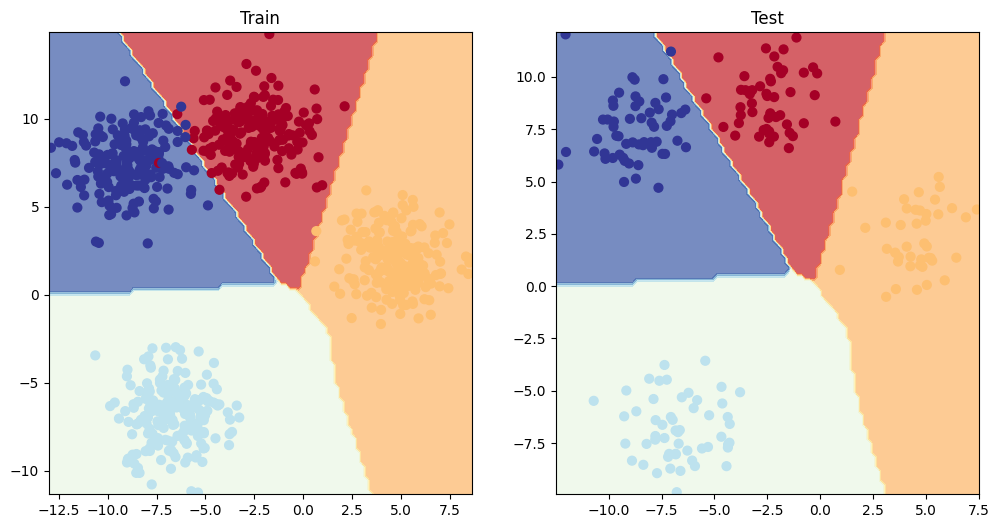

In [159]:
# Plot the decision boundary
# Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

### 8. A few more classification metrics... (to evaluate our classification model)

- Accuracy: How many our model got it right out of 100 samples
- Precision
- Recall
- F1 Score
- Confusion matrix
- Classification report